# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


### Вывод:
- Пропущенных значений нет
- Типы столбцов в порядке
- Дубликатов нет
- Регистр змеиный в столбцах соблюден

## Разбейте данные на выборки

В качестве целей возьмем столбец is_ultra, а в качестве признаков будут выступать все остальные столбцы

In [7]:
features = df.drop(['is_ultra'], axis = 1)
target = df['is_ultra']

Разделим исходные данные на обучающую, валидационную и тестовую выборки

In [8]:
features_train, features_part, target_train, target_part = train_test_split(features, target, test_size=0.3, random_state=12345, stratify = target)
features_valid, features_test, target_valid, target_test = train_test_split(features_part, target_part, test_size=0.5, random_state=12345, stratify = target_part)

### Вывод
- Разделили тестовую, тренировочную выборку и валидационную на признаки (features) и целевой признак (target).

## Исследуйте модели

In [9]:
# Решающее дерево
best_model_tree = None
best_result = 0
accuracy_arr_tree = []
for i in range(1, 50):
    model = DecisionTreeClassifier(random_state=12345, max_depth=i)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    result = accuracy_score(target_valid, prediction)
    accuracy_arr_tree.append(result)
    if best_result < result:
        best_result = result
        depth = i
        best_model_tree = model

accuracy_arr_tree = pd.Series(accuracy_arr_tree) 
print("Лучшая точность:", best_result, 'c значением глубины =', depth)

Лучшая точность: 0.8070539419087137 c значением глубины = 5


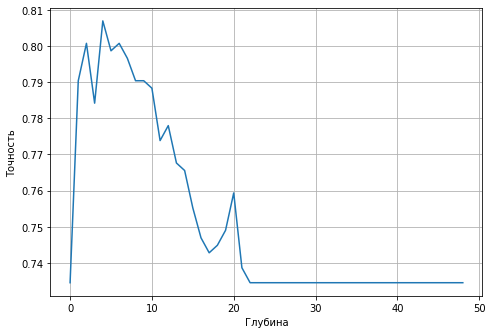

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid()
ax.set_xlabel('Глубина')
ax.set_ylabel('Точность')
ax.plot(accuracy_arr_tree.index, accuracy_arr_tree)
plt.show()

Данная модель показывает неплохой результат относительно минимума = 0.75 для задачи.
Исходя из графика можно сказать, что переобучение наступает при глубине = 5, а когда глубина достигает значения примерно 22, то видно ровный график точности, что означает - она вовсе перестала изменятся.

In [11]:
# Случайный лес
best_model_rand_forest = None
rand_forest_res = {}
best_result = 0
best_est = 0
best_depth = 0
for depth in range(1,11):
    accuracy_arr_rand_forest = []
    for est in range(1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth)
        model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        result = accuracy_score(target_valid, prediction)
        accuracy_arr_rand_forest.append(result)
        
        if best_result < result:
            best_result = result
            best_est = est
            best_depth = depth
            best_model_rand_forest = model
        
    rand_forest_res.update({depth : accuracy_arr_rand_forest})

data_rand_forest = pd.DataFrame(rand_forest_res)


print('Лучшая точность: ', data_rand_forest.max().max(), 'при глубине = {0} и количестве деревьев = {1}'.format(best_depth, best_est))

Лучшая точность:  0.8236514522821576 при глубине = 5 и количестве деревьев = 8


In [12]:
display(data_rand_forest)

,1,2,3,4,5,6,7,8,9,10
0,0.771784,0.807054,0.807054,0.792531,0.794606,0.800830,0.784232,0.788382,0.811203,0.798755
1,0.767635,0.804979,0.794606,0.790456,0.775934,0.780083,0.771784,0.771784,0.775934,0.761411
2,0.771784,0.809129,0.802905,0.807054,0.796680,0.786307,0.778008,0.786307,0.796680,0.790456
3,0.769710,0.788382,0.798755,0.807054,0.786307,0.788382,0.773859,0.786307,0.790456,0.775934
4,0.767635,0.782158,0.798755,0.804979,0.792531,0.796680,0.792531,0.788382,0.804979,0.796680
5,0.771784,0.788382,0.804979,0.813278,0.811203,0.796680,0.794606,0.792531,0.807054,0.790456
6,0.771784,0.782158,0.809129,0.817427,0.817427,0.798755,0.800830,0.786307,0.794606,0.802905
7,0.769710,0.782158,0.811203,0.815353,0.823651,0.807054,0.802905,0.800830,0.807054,0.790456
8,0.771784,0.780083,0.815353,0.815353,0.821577,0.809129,0.809129,0.792531,0.817427,0.796680
9,0.771784,0.794606,0.811203,0.815353,0.819502,0.807054,0.800830,0.800830,0.809129,0.790456


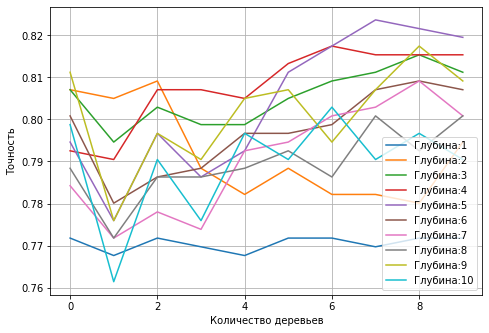

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.grid()
ax.set_xlabel('Количество деревьев')
ax.set_ylabel('Точность')
for name_column in range(len(data_rand_forest)):
    ax.plot(data_rand_forest.index, data_rand_forest[name_column + 1], label = 'Глубина:' + str(name_column + 1))
    
ax.legend()
plt.show()

Исходя из полученных данных, видно что наилучший результат получается при глубине = 5 и количестве деревьев = 8, что подтверждает полученный датафрейм и график. Это лучшее значение из всех трех моделей, но алгоритм работает достаточно медленно, особенно если попытаться увеличить значения глубины и количества деревьев. Таким образом, вывод: алгоритм точный, но медленный.

In [14]:
#Случайный лес(2 вариант)
accur=0
est=0
dep=0
for estim in range(2,15, 3): #это просчитала в большем диапозоне
    for depth in range(11,15):
        model = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        accuracy = accuracy_score(target_valid, predictions)
        if accuracy > accur:
            accur=accuracy
            est=estim
            dep=depth
print("n_estimators:", est, "depth:", dep, "accuracy", accur)

n_estimators: 8 depth: 13 accuracy 0.8070539419087137


In [15]:
# Модель логистической регрессии
model =  LogisticRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions)
print('accuracy:', accuracy)

accuracy: 0.7053941908713693


Совсем плохой результат... Возможно, потому что мало данных, все-таки в задании тренажера их было больше

### Вывод
- Обучили дерево принятия решений, лучшее с глубиной = 12
- Обучили модель случайного леса с подбором глубины. Лучшее с количеством дервьев 7, глубиной 8.
- Обучили модель логистической регрессии и получили метрики хуже остальных моделей.

## Проверьте модель на тестовой выборке

Проверка работы моделей с тестовыми данными

In [16]:
prediction_tree = best_model_tree.predict(features_test)
result_tree = accuracy_score(target_test, prediction_tree)

prediction_rand_forest = best_model_rand_forest.predict(features_test)
result_rand_forest = accuracy_score(target_test, prediction_rand_forest)

prediction_LR = model.predict(features_test)
result_LR = accuracy_score(target_test, prediction_LR)

print('Дерево решений:', result_tree)
print('Случайный лес:', result_rand_forest)
print('Логистическая регрессия:', result_LR)

Дерево решений: 0.7929606625258799
Случайный лес: 0.8136645962732919
Логистическая регрессия: 0.7204968944099379


Как видно, особенно ничего не поменялось, лучше даже чем на валидационной выборке себя проявил случаный лес. Также выросло значение модели логистической регрессии

## (бонус) Проверьте модели на адекватность

In [17]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)
dummy_clf.fit(features_train, target_train)
dummy_clf.score(features_train, target_train)

0.6936416184971098

Нужно проверить имеет ли модель предсказательную силу и справляется ли она с задачей лучше, чем если бы мы предсказывали случайным образом или каким-нибудь константным значением. Для этого нужно сравнить показатели метрик модели c DummyClassifier. Таким образом, простейшая модель ошибается в ~30%, выбранная в ~19%. (Это как я поняла, но не уверена в правльности)

## Общий вывод:
- Был изучен файл с данными 
- Разделены исходные данные на на обучающую, валидационную и тестовую выборки.
- Исследованы качества разных моделей, меняя гиперпараметры, таким образом, лучше себя показала модель случайного леса (как и в тренажере), она работает меделеннее, но дает лучший результат.
- Проверены качества моделей на тестовых выборках, опять же лучше модель случайного леса.
- Проверены модели на вменяемость

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
